In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#open csv 1
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1UG3Q_eNkCIyEdUbK-0sqI9orROzUhDIv', sep=",", engine="python")  
print(df.head())

   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   

             date_time  
0  2017-04-17 15:27:07  
1  2017-04-17 15:26:51  
2  2017-04-17 15:19:22  
3  2017-04-17 15:19:13  
4  2017-04-17 15:18:04  


In [2]:
#open csv 2
df_2 = pd.read_csv('https://drive.google.com/uc?export=download&id=18-OfKVWIhRkIK2VNoF1w0cW2ZJeodn-6', sep=",", engine="python")  
print(df_2.head())

   client_id             visitor_id                      visit_id  \
0     763412  601952081_10457207388  397475557_40440946728_419634   
1    6019349  442094451_91531546617  154620534_35331068705_522317   
2    6019349  442094451_91531546617  154620534_35331068705_522317   
3    6019349  442094451_91531546617  154620534_35331068705_522317   
4    6019349  442094451_91531546617  154620534_35331068705_522317   

  process_step            date_time  
0      confirm  2017-06-06 08:56:00  
1      confirm  2017-06-01 11:59:27  
2       step_3  2017-06-01 11:58:48  
3       step_2  2017-06-01 11:58:08  
4       step_1  2017-06-01 11:57:58  


In [3]:
# Concatanate both DFs
df = pd.concat([df, df_2], axis=0, ignore_index=True)

df.head(20)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43


In [4]:
df.shape

(755405, 5)

In [5]:
df.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [6]:
df.isnull().sum().sort_values(ascending=False)

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [7]:
df['process_step'].value_counts()	

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

In [8]:
df_2 = pd.read_csv('https://drive.google.com/uc?export=download&id=1iKkd732EWbYFhLckqPr0xZIpJqUnRG9v', sep=",", engine="python")  

In [9]:
df_2.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [10]:
df_2.isnull().sum().sort_values(ascending=False)

clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64

In [11]:
# Display rows where any column contains null values
rows_with_nulls = df_2[df_2.isnull().any(axis=1)]

print(rows_with_nulls)


       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
4164     7402828             NaN               NaN       NaN   NaN        NaN   
8316      355337             NaN               NaN       NaN   NaN        NaN   
8677     8412164             NaN               NaN       NaN   NaN        NaN   
9583     4666211             8.0             106.0       NaN     F        2.0   
13444    2222915             NaN               NaN       NaN   NaN        NaN   
18066    4876926             NaN               NaN       NaN   NaN        NaN   
25961    5277910             NaN               NaN       NaN   NaN        NaN   
28432    7616759             NaN               NaN       NaN   NaN        NaN   
35323    8191345             NaN               NaN       NaN   NaN        NaN   
43518    1227228             NaN               NaN       NaN   NaN        NaN   
46076    8611797             NaN               NaN       NaN   NaN        NaN   
47189    5144725            

In [12]:
#drop rows with null values

df_2 = df_2.dropna()

In [13]:
df_2.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,5.005026e+06,12.053007,150.659999,46.442240,2.255532,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.591273,0.535000,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.500000,2.000000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,2.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,2.000000,1.375461e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [14]:
df_2.shape

(70594, 9)

In [15]:
df_2.rename(columns={'bal': 'balance'}, inplace=True)

In [16]:
df_2.head

<bound method NDFrame.head of        client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0         836976             6.0              73.0      60.5     U        2.0   
1        2304905             7.0              94.0      58.0     U        2.0   
2        1439522             5.0              64.0      32.0     U        2.0   
3        1562045            16.0             198.0      49.0     M        2.0   
4        5126305            12.0             145.0      33.0     F        2.0   
...          ...             ...               ...       ...   ...        ...   
70604    7993686             4.0              56.0      38.5     U        3.0   
70605    8981690            12.0             148.0      31.0     M        2.0   
70606     333913            16.0             198.0      61.5     F        2.0   
70607    1573142            21.0             255.0      68.0     M        3.0   
70608    5602139            21.0             254.0      59.5     F        3.0  

In [17]:
df_3 = pd.read_csv('https://drive.google.com/uc?export=download&id=1agh9FapkYsiydp-__dTdJmfV3Zep3O4r', sep=",", engine="python")  

In [18]:
df_3.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [19]:
df_2 = pd.merge(df_2, df_3, how='left', on='client_id')

In [20]:
df_2.head(50)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test


In [21]:
df_2.isnull().sum().sort_values(ascending=False)


Variation           20107
client_id               0
clnt_tenure_yr          0
clnt_tenure_mnth        0
clnt_age                0
gendr                   0
num_accts               0
balance                 0
calls_6_mnth            0
logons_6_mnth           0
dtype: int64

In [22]:
df_variation_value = df_2.dropna()

In [23]:
df_variation_value.shape

(50487, 10)

In [24]:

df_2.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [25]:
df_2.describe()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,balance,calls_6_mnth,logons_6_mnth
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,5.005026e+06,12.053007,150.659999,46.442240,2.255532,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.591273,0.535000,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.500000,2.000000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,2.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,2.000000,1.375461e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


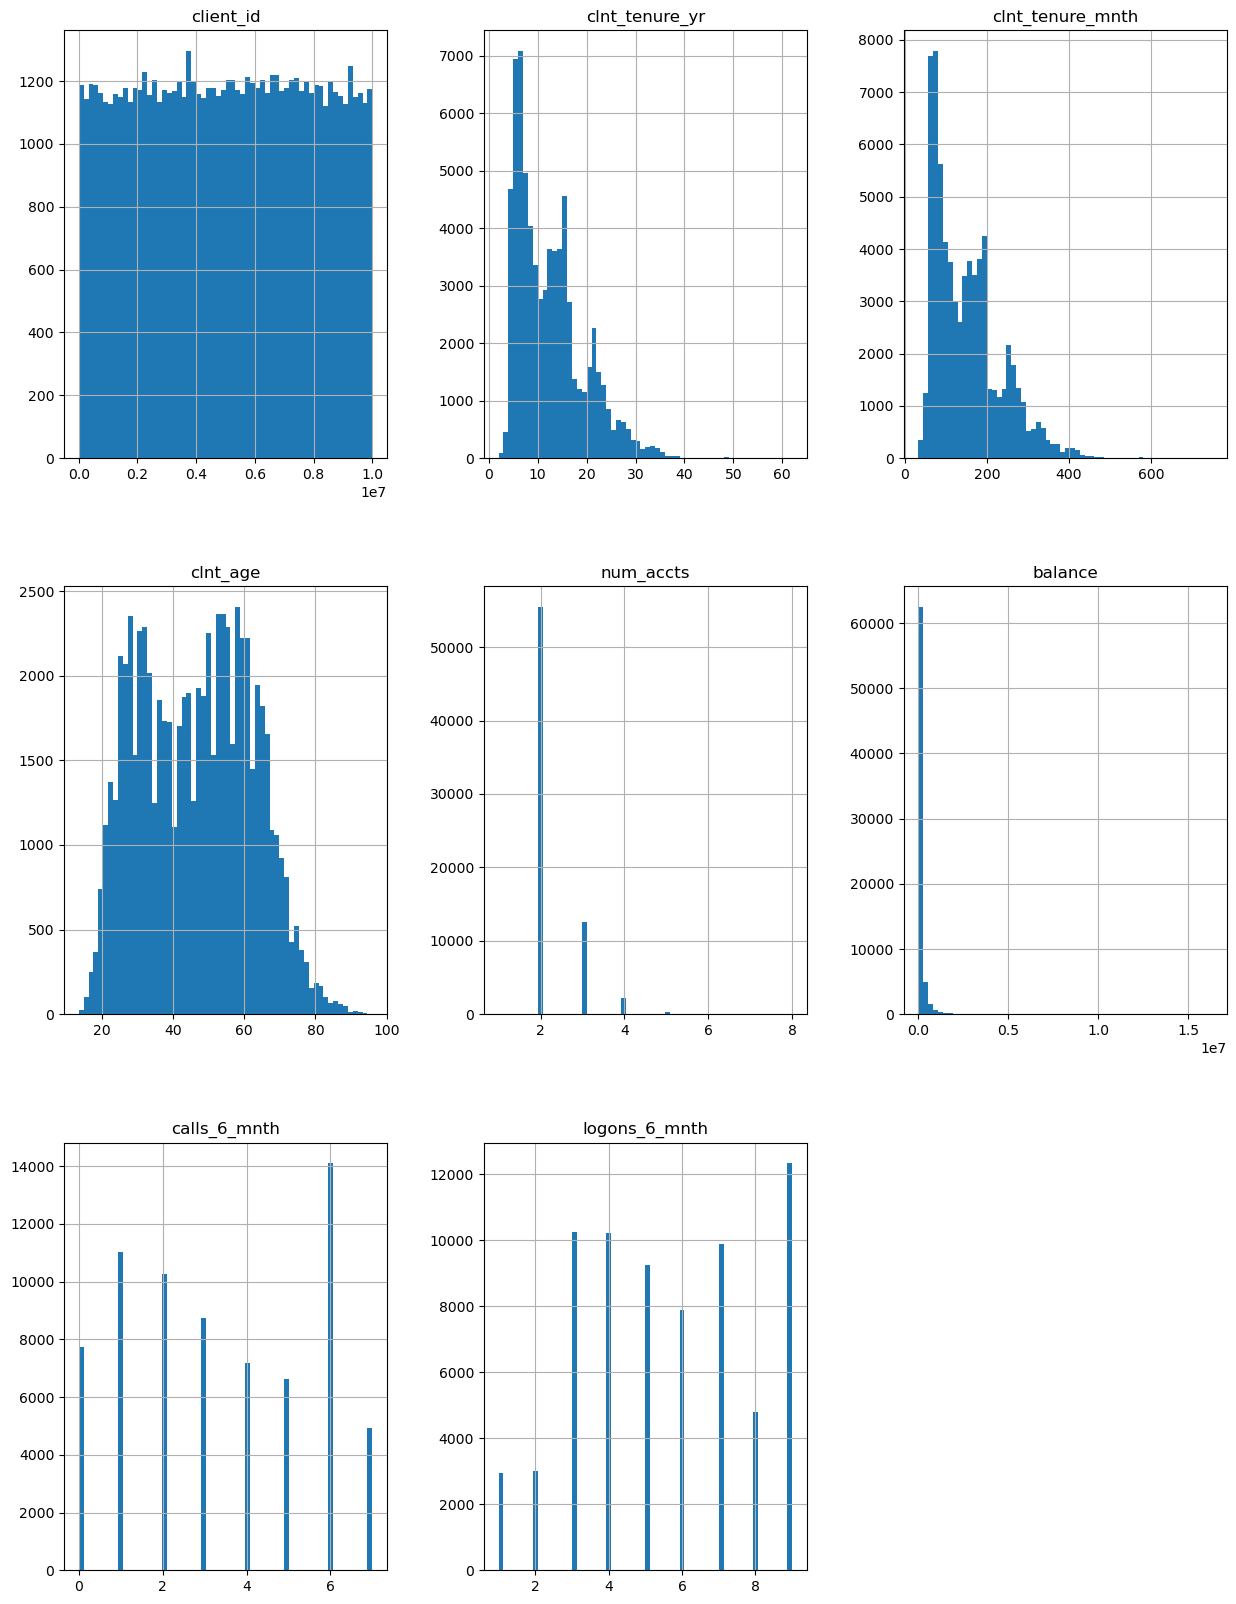

In [26]:
df_2.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [27]:
proportion_table = df_2['balance'].value_counts(normalize=True)

(0.0, 10000000.0)

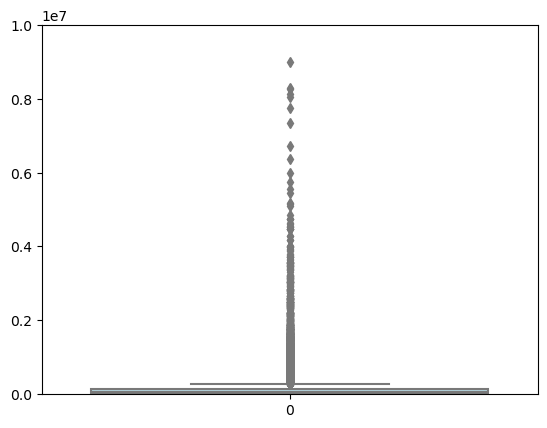

In [28]:
sns.boxplot(data = df_variation_value['balance'], color="lightblue")
plt.ylim(0, 10000000)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 500000.0)

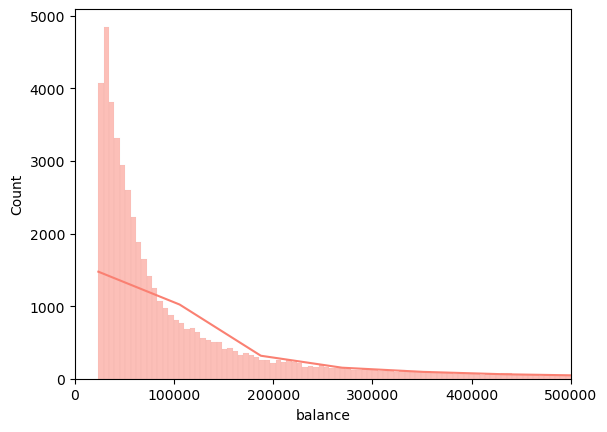

In [29]:
sns.histplot(df_variation_value['balance'], kde=True, color="salmon")
plt.xlim(0, 500000)

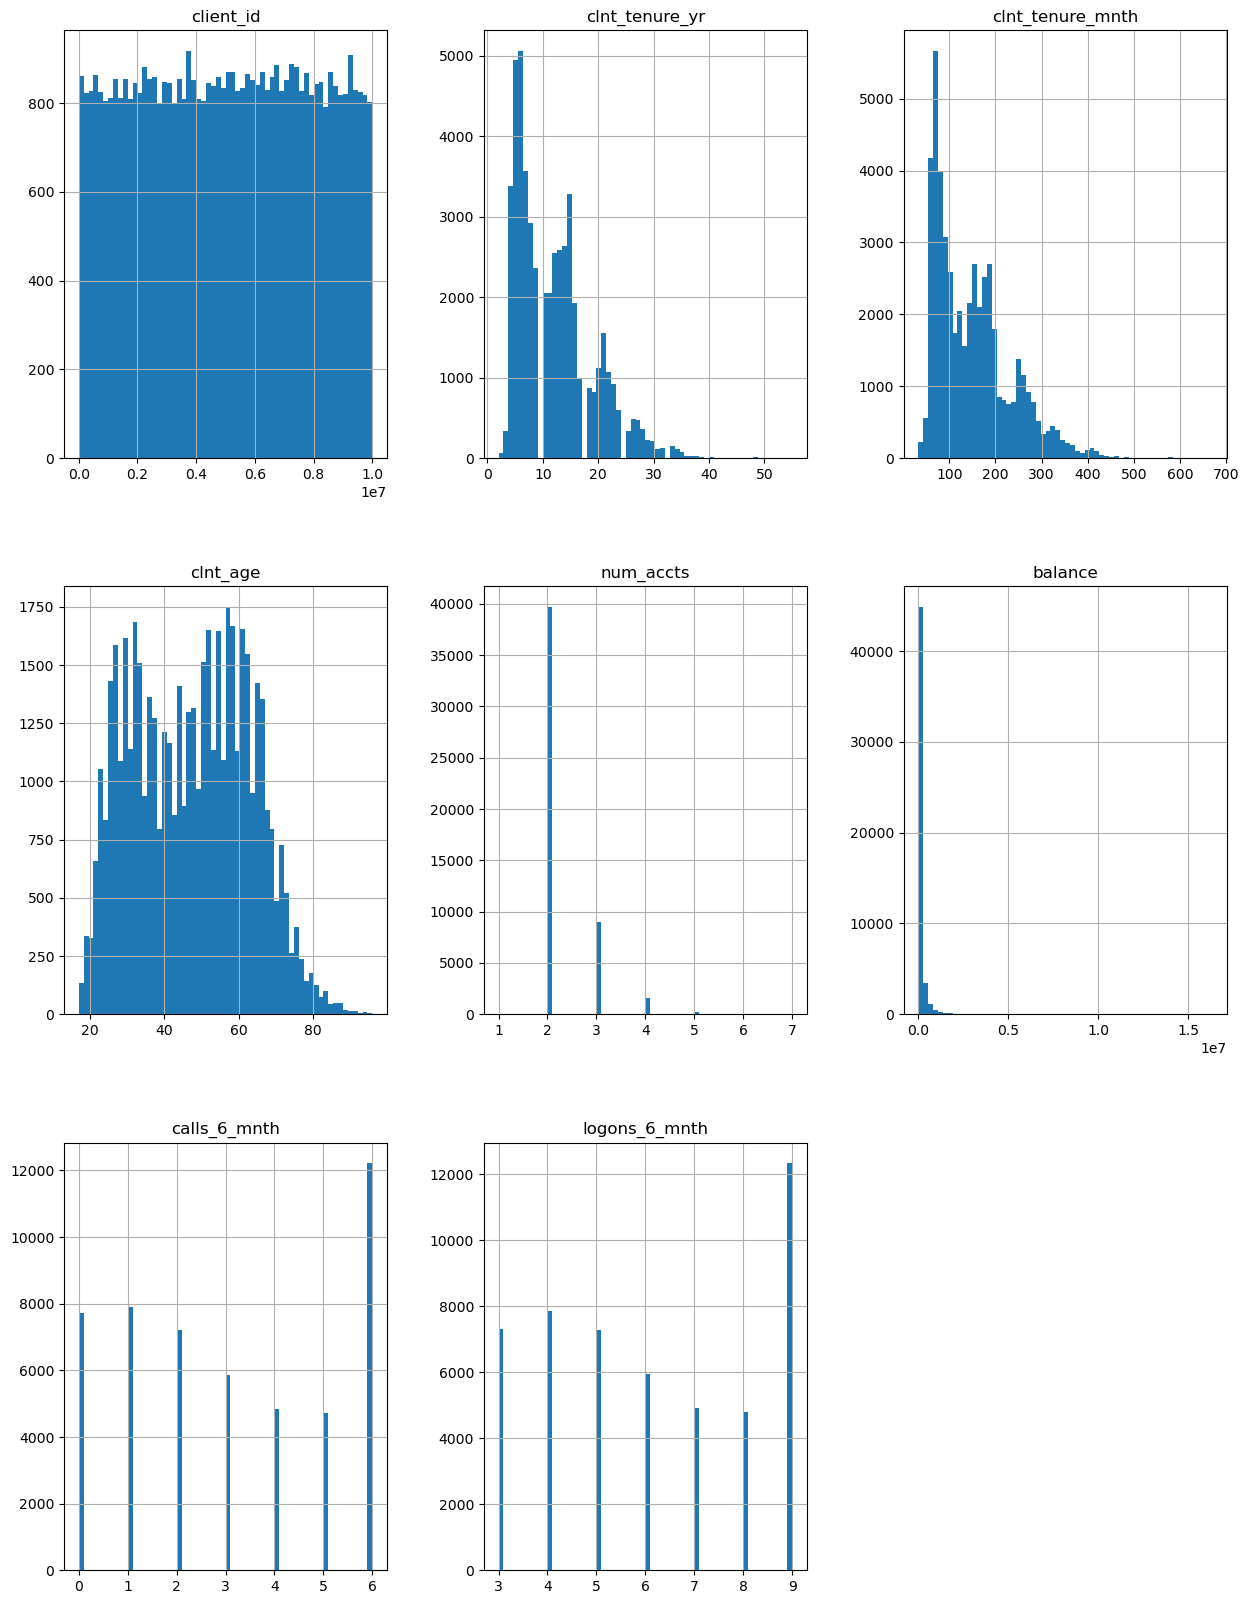

In [30]:
df_variation_value.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [31]:
df_variation_value.shape

(50487, 10)

In [32]:
df_test = df_variation_value[df_variation_value['Variation'] == 'Test']
df_control = df_variation_value[df_variation_value['Variation'] == 'Control']
df_test.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,balance,calls_6_mnth,logons_6_mnth
count,2.696100e+04,26961.000000,26961.000000,26961.000000,26961.000000,2.696100e+04,26961.000000,26961.000000
mean,4.999639e+06,11.982901,149.852899,47.163922,2.249917,1.489626e+05,3.061941,6.101851
std,2.877510e+06,6.844947,81.783390,15.514461,0.529335,3.073737e+05,2.190590,2.177119
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.516570e+06,6.000000,82.000000,33.500000,2.000000,3.972920e+04,1.000000,4.000000
50%,5.025928e+06,11.000000,134.000000,47.500000,2.000000,6.546836e+04,3.000000,6.000000
75%,7.470213e+06,15.000000,191.000000,59.500000,2.000000,1.394786e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


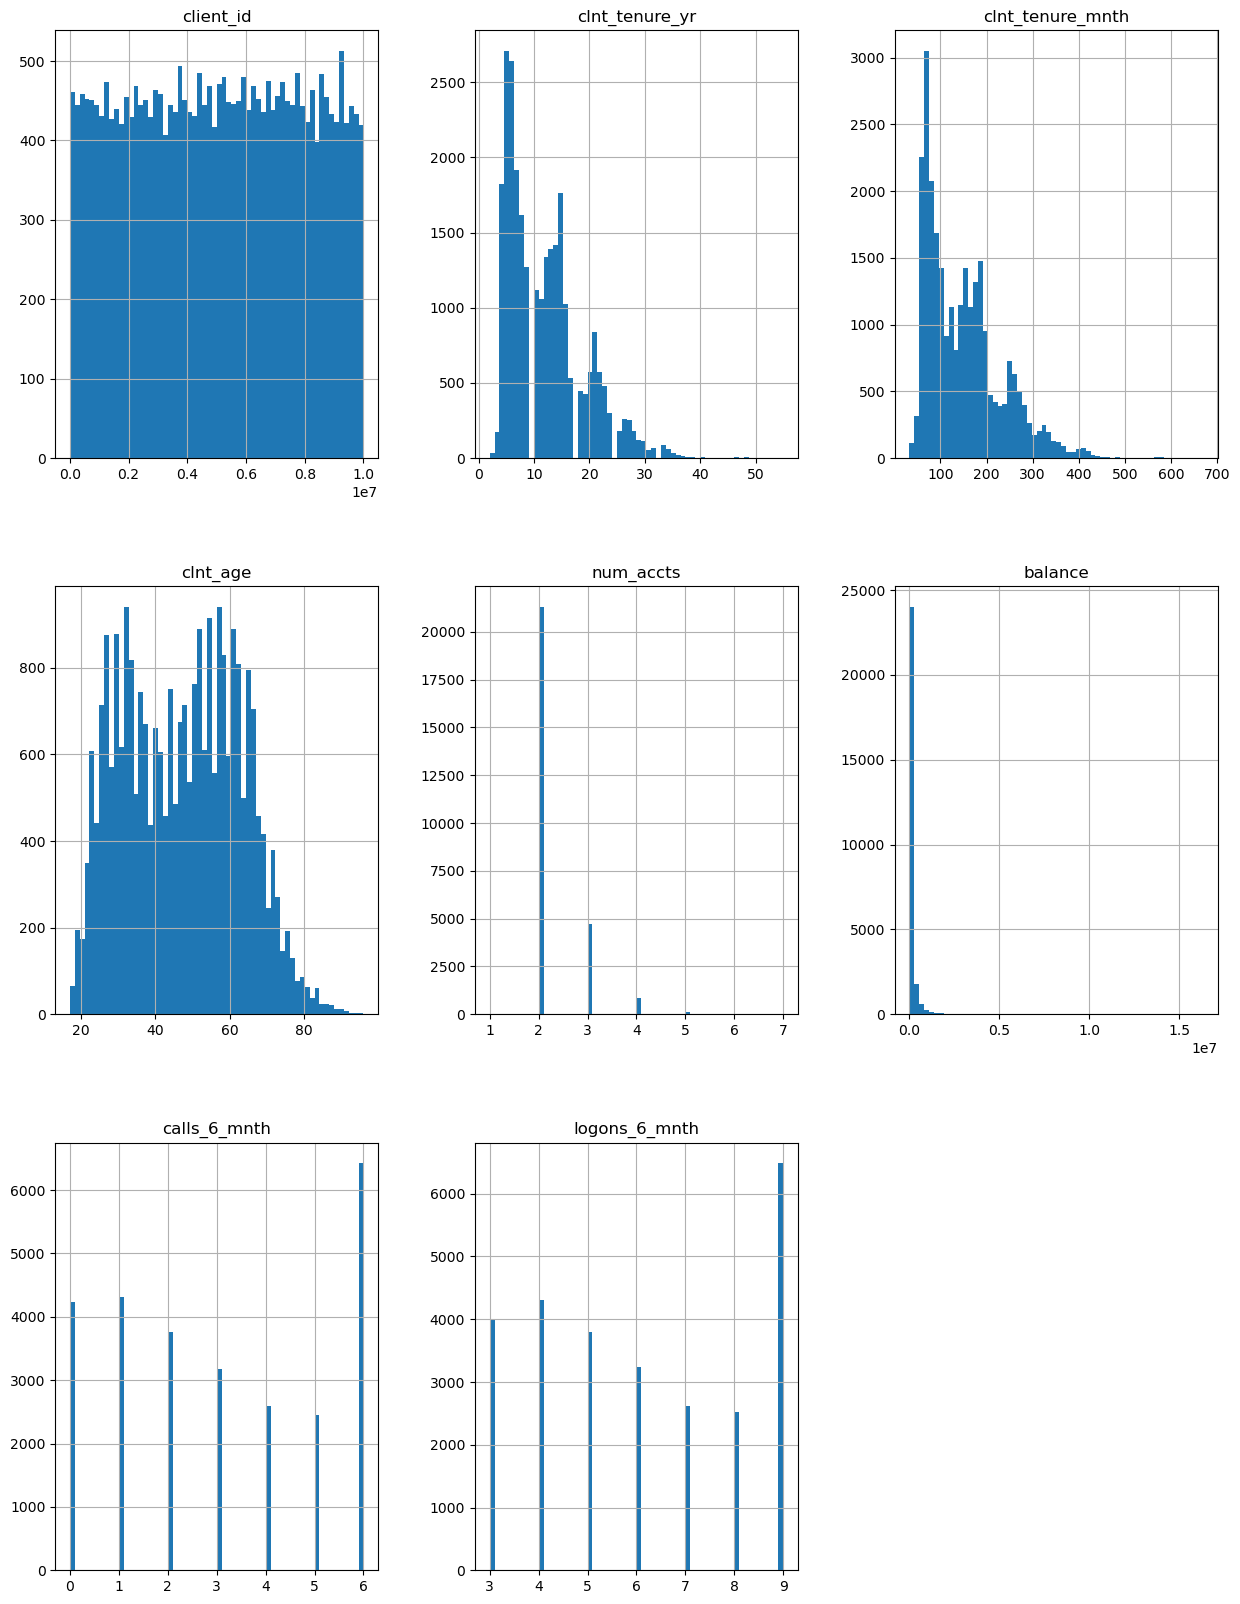

In [33]:
df_test.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [34]:
df_control.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,balance,calls_6_mnth,logons_6_mnth
count,2.352600e+04,23526.000000,23526.000000,23526.000000,23526.000000,2.352600e+04,23526.000000,23526.000000
mean,5.013676e+06,12.087860,151.062102,47.498427,2.259925,1.501519e+05,3.129176,6.166242
std,2.877414e+06,6.877626,82.127663,15.521781,0.538568,2.958124e+05,2.184541,2.173053
min,1.028000e+03,2.000000,33.000000,17.000000,2.000000,2.378961e+04,0.000000,3.000000
25%,2.515177e+06,6.000000,82.000000,33.500000,2.000000,4.012295e+04,1.000000,4.000000
50%,5.023832e+06,11.000000,137.000000,48.500000,2.000000,6.603145e+04,3.000000,6.000000
75%,7.483638e+06,16.000000,192.000000,60.000000,2.000000,1.406156e+05,5.000000,8.000000
max,9.998921e+06,55.000000,669.000000,96.000000,7.000000,8.292996e+06,6.000000,9.000000


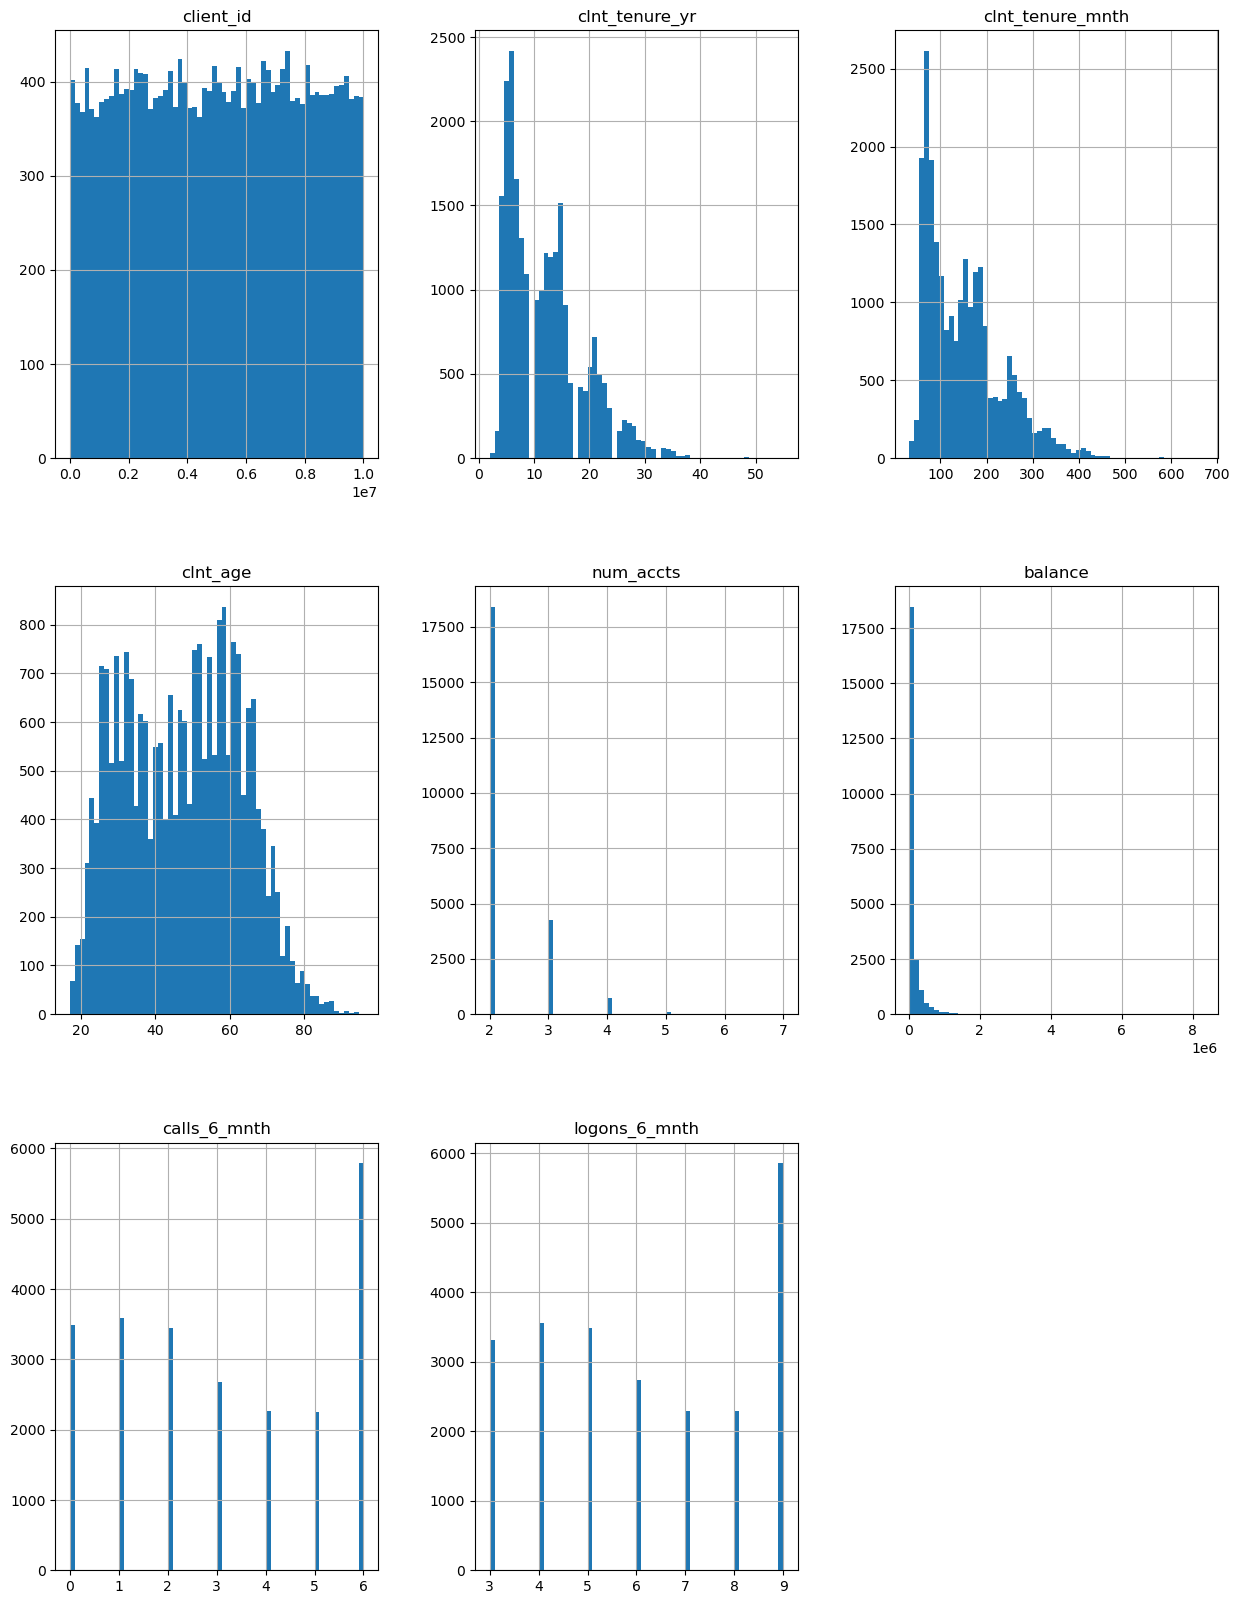

In [35]:
df_control.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 500000.0)

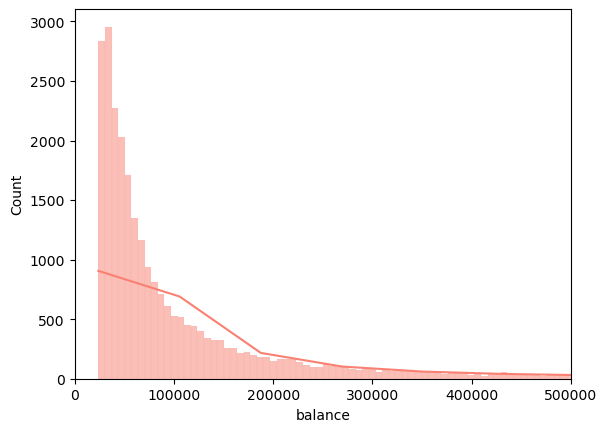

In [36]:
sns.histplot(df_test['balance'], kde=True, color="salmon")
plt.xlim(0, 500000)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 500000.0)

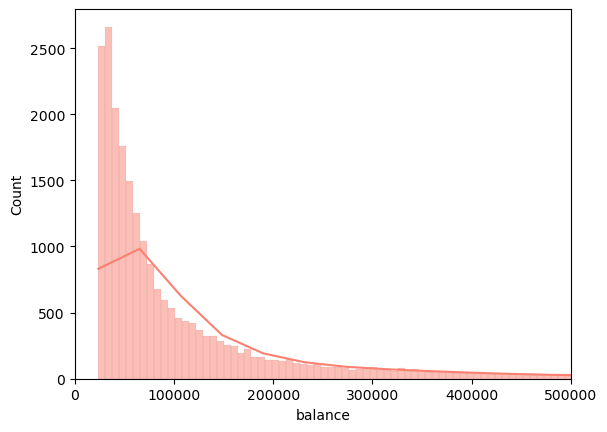

In [37]:
sns.histplot(df_control['balance'], kde=True, color="salmon")
plt.xlim(0, 500000)

In [38]:
df_test['balance'].mode(), df_control['balance'].mode()

(0    29389.11
 1    31398.74
 Name: balance, dtype: float64,
 0    31188.62
 Name: balance, dtype: float64)

In [39]:
df_test["gendr"].value_counts()

gendr
U    9266
M    8977
F    8716
X       2
Name: count, dtype: int64

In [40]:
df_control["gendr"].value_counts()

gendr
U    8014
M    7970
F    7542
Name: count, dtype: int64

In [41]:
df_final = pd.merge(df_variation_value, df, how='left', on='client_id')

df_final.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
balance             0
calls_6_mnth        0
logons_6_mnth       0
Variation           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
dtype: int64

In [42]:
df_final.head()
df_final.shape

(321195, 14)

In [43]:
df_final = df_final.drop_duplicates()
df_final.head(50)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
5,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_1,2017-04-02 11:21:38
6,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28
7,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44
8,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40
9,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 10:59:43





Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

Completion Rate: The proportion of users who reach the final ‘confirm’ step.


In [46]:
#count of unique customer ids where step = confirmation / count of total unique customers 

#Filter customers from the test group on step 'confirm'
df_final_test_confirmation = df_final[(df_final['Variation'] == 'Test') & (df_final['process_step'] == 'confirm')]

#Count unique customers from the test group on step 'confirm'
unique_client_count_test_confirmation = df_final_test_confirmation['client_id'].nunique()

#Filter customers from the test group on all steps
df_final_test = df_final[(df_final['Variation'] == 'Test')]
#Count unique customers from the test group
unique_client_count_test = df_final_test['client_id'].nunique()

#Calculate the completion rate in the Test group
completion_rate_test = unique_client_count_test_confirmation/ unique_client_count_test
completion_rate_test = round(completion_rate_test, 2)
completion_rate_test


0.69

In [47]:
#count of unique customer ids where step = confirmation / count of total unique customers 

#Filter customers from the Control group on step 'confirm'
df_final_control_confirmation = df_final[(df_final['Variation'] == 'Control') & (df_final['process_step'] == 'confirm')]

#Count unique customers from the Control group on step 'confirm'
unique_client_count_control_confirmation = df_final_test_confirmation['client_id'].nunique()

#Filter customers from the Control group on all steps
df_final_control = df_final[(df_final['Variation'] == 'Control')]
#Count unique customers from the test group
unique_client_count_control = df_final_control['client_id'].nunique()

#Calculate the completion rate in the Control group
completion_rate_control = unique_client_count_control_confirmation/ unique_client_count_control
completion_rate_control = round(completion_rate_control, 2)
completion_rate_control

0.79

Conclusion: 
KPI: Completion rate 
Test group: 69%
Control group: 66%

Time Spent on Each Step: The average duration users spend on each step.

In [50]:

df_final['date_time'] = pd.to_datetime(df_final['date_time'])
# Define the order of steps to consider
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Sort by client_id and date_time
df_final.sort_values(by=['client_id', 'date_time'], inplace=True)

# Calculate time spent between the specific steps
df_final['time_spent'] = df_final['date_time'].diff().dt.total_seconds() #/ 60  # Time in minutes


# Keep only the rows with positive time spent (i.e., moving forward)
df_final['previous_step'] = df_final['process_step'].shift()

# Create a mask to identify forward transitions based on step order
df_final['previous_step_index'] = df_final['previous_step'].apply(lambda x: step_order.index(x) if x in step_order else -1)
df_final['current_step_index'] = df_final['process_step'].apply(lambda x: step_order.index(x) if x in step_order else -1)

# Check for valid forward transitions
forward_mask = (df_final['time_spent'] > 0) & \
                (df_final['current_step_index'] > df_final['previous_step_index'])

# Filter the results
results = df_final[forward_mask]

# Show time spent for each relevant transition
print("Time spent between consecutive steps:")
#print(results[['client_id', 'process_step', 'time_spent']].dropna())
results.head(50)




Time spent between consecutive steps:


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,time_spent,previous_step,previous_step_index,current_step_index
255395,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,7.0,start,0,1
255394,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,32.0,step_1,1,2
255393,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,99.0,step_2,2,3
255392,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,20.0,step_3,3,4
9748,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,7.0,start,0,1
9747,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_2,2017-04-12 15:41:53,18.0,step_1,1,2
9746,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_3,2017-04-12 15:45:02,189.0,step_2,2,3
9745,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,confirm,2017-04-12 15:47:45,163.0,step_3,3,4
302414,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,49.0,start,0,1
302412,1028,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,Control,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,9.0,step_1,1,2


In [51]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = results['time_spent'].quantile(0.25)
Q3 = results['time_spent'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = results[
    (results['time_spent'] < lower_bound) |
    (results['time_spent'] > upper_bound)
]

# Remove outliers
filtered_average_duration_iqr = results[
    ~results.index.isin(outliers_iqr.index)
]

# Add a row for 'start' step time before it moves to 'step_1'
# Group by 'previous_step' to calculate the average time after 'start'
mean_time_spent_start = filtered_average_duration_iqr[filtered_average_duration_iqr['previous_step'] == 'start'].groupby('Variation')['time_spent'].mean().reset_index()

# Insert the 'start' step to the DataFrame for comparison
mean_time_spent_start['process_step'] = 'start'
mean_time_spent_start = mean_time_spent_start[['process_step', 'Variation', 'time_spent']]

# Append the 'start' step to the results DataFrame
filtered_average_duration_iqr = pd.concat([filtered_average_duration_iqr, mean_time_spent_start])

# Pivot the table for easier comparison between Test and Control
comparison = filtered_average_duration_iqr.pivot_table(
    index='process_step', 
    columns='Variation', 
    values='time_spent', 
    aggfunc='mean'
).reset_index()

# Round the 'time_spent' values to 2 decimal places
comparison = comparison.round(2)

# Display the comparison
print("Average time spent per step (after removing outliers):")
print(comparison)


Average time spent per step (after removing outliers):
Variation process_step  Control   Test
0              confirm    68.53  55.02
1                start    26.11  20.02
2               step_1    26.04  19.77
3               step_2    28.99  31.56
4               step_3    64.05  64.88


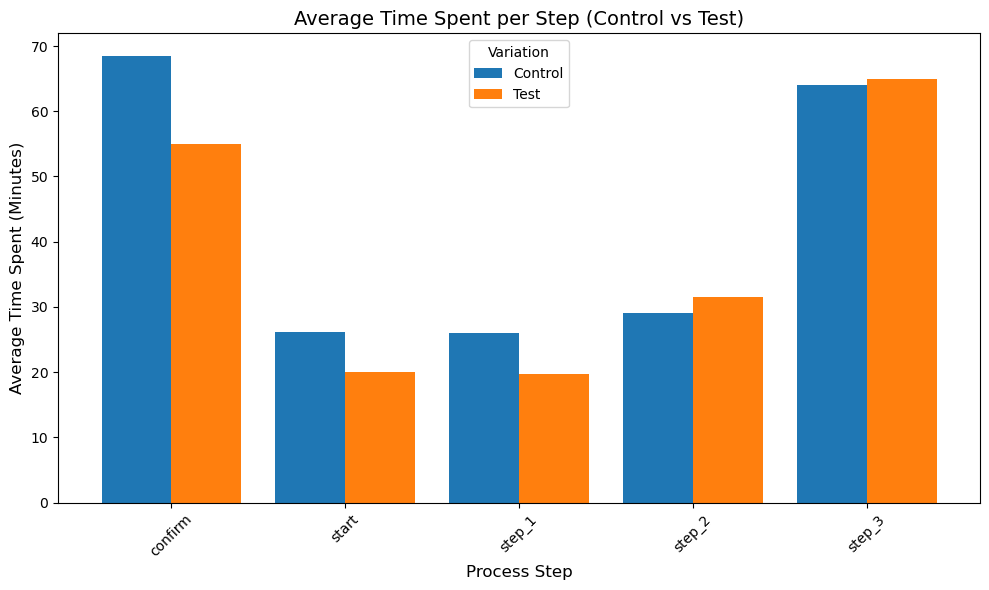

In [52]:
import matplotlib.pyplot as plt

# Plotting the comparison chart
comparison.plot(kind='bar', x='process_step', figsize=(10, 6), width=0.8)

# Adding labels and title
plt.title("Average Time Spent per Step (Control vs Test)", fontsize=14)
plt.xlabel("Process Step", fontsize=12)
plt.ylabel("Average Time Spent (Minutes)", fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the legend
plt.legend(title='Variation')

# Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


In [53]:
#3. KPI 
#filter out the "None" previous steps values. (Meaning there is no previous value before start).
#Filter for when the "current step" is smaller than previous step.

df_final.head(50)

#control: 

df_final_error_control = df_final[(df_final['Variation'] == 'Control') & (df_final['current_step_index'] < df_final['previous_step_index'])]

final_error_control = df_final_error_control['client_id'].count()
total_control = df_final[(df_final['Variation'] == 'Control')]['client_id'].count()

error_rate_control = final_error_control/total_control
error_rate_control = round(error_rate_control, 2)

#test:

df_final_error_test = df_final[(df_final['Variation'] == 'Test') & (df_final['current_step_index'] < df_final['previous_step_index'])]

final_error_test = df_final_error_test['client_id'].count()
total_test = df_final[(df_final['Variation'] == 'Test')]['client_id'].count()

error_rate_test = final_error_test/total_test
error_rate_test = round(error_rate_test, 2)
error_rate_control, error_rate_test

#KPI error rate control is 0.22 and error rate test 0.23.

(0.22, 0.23)

In [54]:
# Hypotheses

#Hyp. 1

#H0: The completion rate is not significantely different between the Test and Control groups.
#H1: The completion rate of the Test group is significantely higher than the one of the control group.

#Hyp. 2

#H0: The increase of the completion rate between the Test and Control groups is less than 5%.
#H1: The increase of the completion rate between the Test and Control groups is at least 5%.

#Hyp. 3

#H0: The average age of clients engaging with the new process is the same as those engaging with the old. 
#H1: The average age of clients engaging with the new process is lower than as those engaging with the old.

#Hyp. 4

#H0: The average client tenure of those engaging with the new process is the same as those engaging with the old process.
#H1: The average client tenure of those engaging with the new process is lower than those engaging with the old process.



In [55]:
df_2["Variation"].fillna("Out", inplace=True)

/var/folders/7c/x67b6nwd1kbd8z85vpp7nrw80000gn/T/ipykernel_2896/2031558844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2["Variation"].fillna("Out", inplace=True)


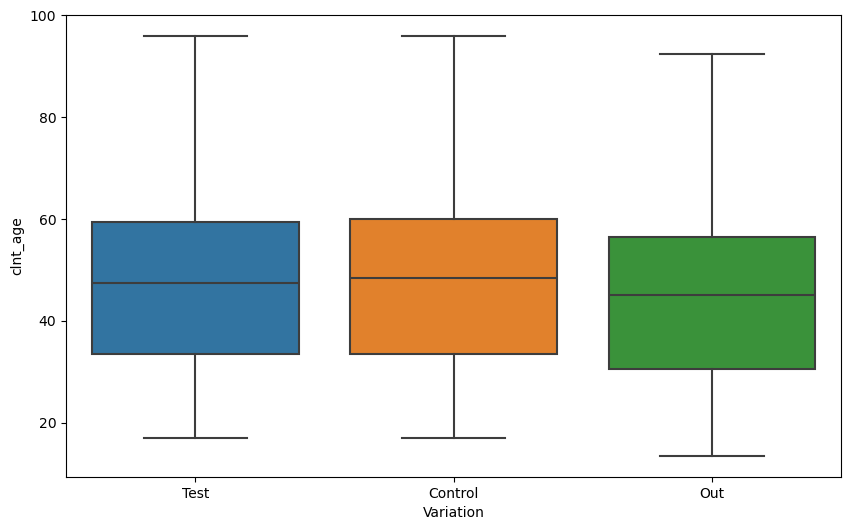

In [56]:
#AGE

df_2["clnt_age"]
plt.figure(figsize=(10, 6)) 
sns.boxplot(x="Variation", y="clnt_age", data=df_2)
plt.show()

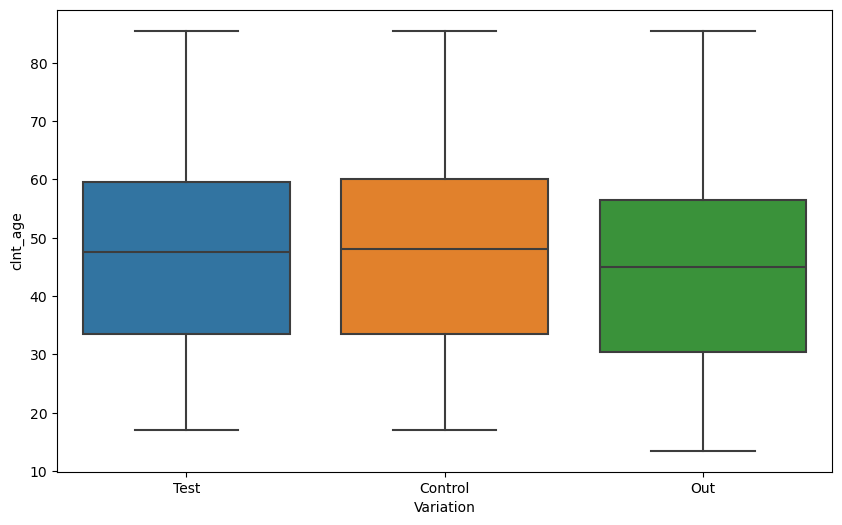

In [57]:
Q1 = df_2["clnt_age"].quantile(0.25)
Q3 = df_2["clnt_age"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

# Identify outliers
outliers_iqr = df_2[
    (df_2["clnt_age"] < lower_bound) |
    (df_2["clnt_age"] > upper_bound)
]

# Remove outliers
filtered_avg_age_iqr = df_2[
    ~df_2.index.isin(outliers_iqr.index)]
filtered_avg_age_iqr

filtered_avg_age_iqr["clnt_age"]
plt.figure(figsize=(10, 6)) 
sns.boxplot(x="Variation", y="clnt_age", data=filtered_avg_age_iqr)
plt.show()

In [58]:
filtered_avg_age_iqr.groupby("Variation")["clnt_age"].mean()

Variation
Control    47.369222
Out        44.162764
Test       47.052994
Name: clnt_age, dtype: float64

In [59]:
filtered_avg_age_iqr["clnt_age"].mean()

46.33443633368364

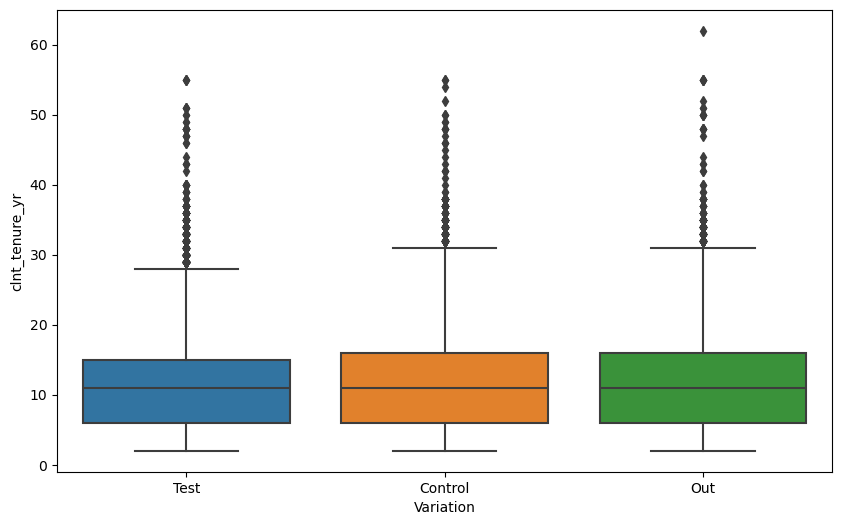

In [60]:
#TENURE AVERAGE

df_2["clnt_tenure_yr"]
plt.figure(figsize=(10, 6)) 
sns.boxplot(x="Variation", y="clnt_tenure_yr", data=df_2)
plt.show()

In [61]:
df_2.groupby("Variation")["clnt_tenure_yr"].mean()

Variation
Control    12.087860
Out        12.106232
Test       11.982901
Name: clnt_tenure_yr, dtype: float64

In [62]:
df_2["clnt_tenure_yr"].mean()

12.053007337734085

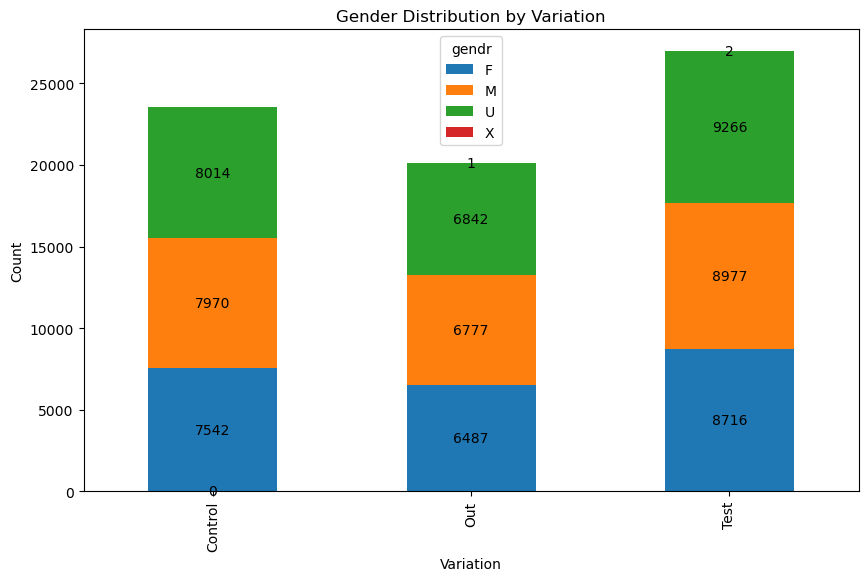

In [63]:
#GENDER 

gender_counts = pd.crosstab(df_2["Variation"], df_2["gendr"])

ax = gender_counts.plot(kind="bar", stacked=True, figsize=(10, 6))

# Add labels and title
plt.title("Gender Distribution by Variation")
plt.xlabel("Variation")
plt.ylabel("Count")

for container in ax.containers:
    ax.bar_label(container, label_type='center') 

# Show the plot
plt.show()

In [64]:
df_2["gendr"].value_counts()

gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

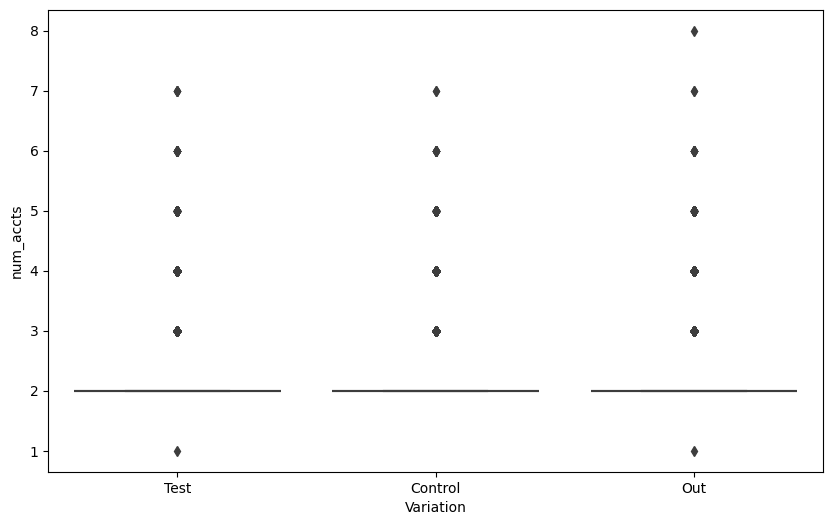

Variation
Control    2.259925
Out        2.257920
Test       2.249917
Name: num_accts, dtype: float64

In [65]:
#NUMBER OF ACCOUNTS

df_2["num_accts"]
plt.figure(figsize=(10, 6)) 
sns.boxplot(x="Variation", y="num_accts", data=df_2)
plt.show()

df_2.groupby("Variation")["num_accts"].mean()

In [66]:
df_2["num_accts"].mean()

2.2555316315834206

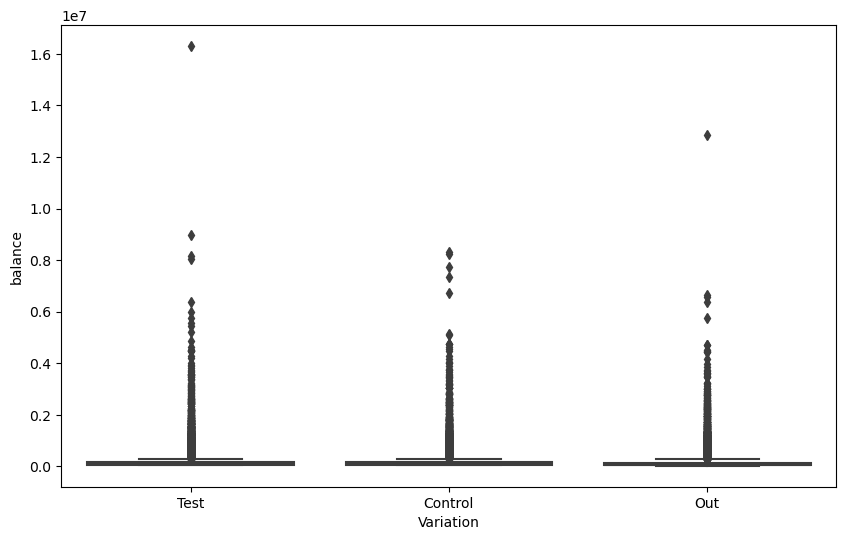

In [67]:
#BALANCE

df_2["balance"]
plt.figure(figsize=(10, 6)) 
sns.boxplot(x="Variation", y="balance", data=df_2)
plt.show()

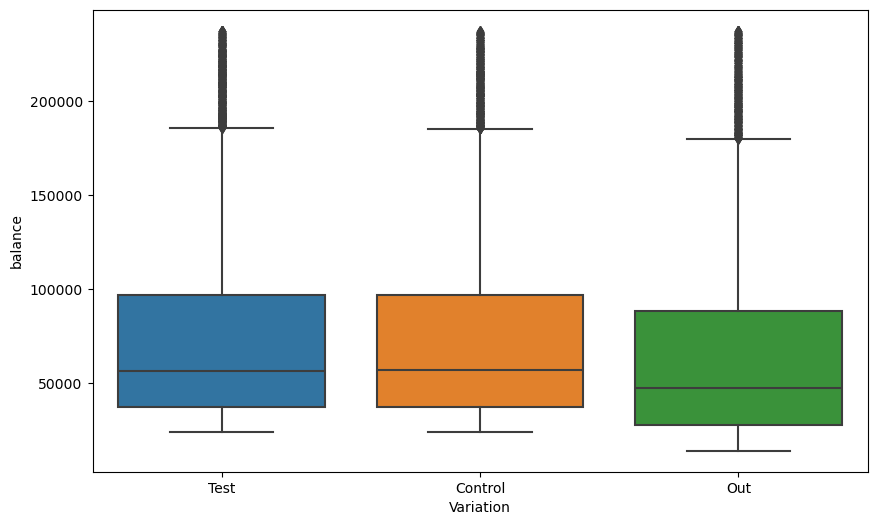

In [68]:
Q1 = df_2["balance"].quantile(0.25)
Q3 = df_2["balance"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

# Identify outliers
outliers_iqr = df_2[
    (df_2["balance"] < lower_bound) |
    (df_2["balance"] > upper_bound)
]

# Remove outliers
filtered_avg_balance_iqr = df_2[
    ~df_2.index.isin(outliers_iqr.index)]
filtered_avg_balance_iqr

filtered_avg_balance_iqr["balance"]
plt.figure(figsize=(10, 6)) 
sns.boxplot(x="Variation", y="balance", data=filtered_avg_balance_iqr)
plt.show()

In [69]:
filtered_avg_balance_iqr.groupby("Variation")["balance"].mean()

Variation
Control    74672.043534
Out        66124.660266
Test       74630.481833
Name: balance, dtype: float64

In [70]:
filtered_avg_balance_iqr["balance"].mean()

#Here we removed the outliers, and you can still see a big difference in the balance between the different variations. 

72216.24513592426

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

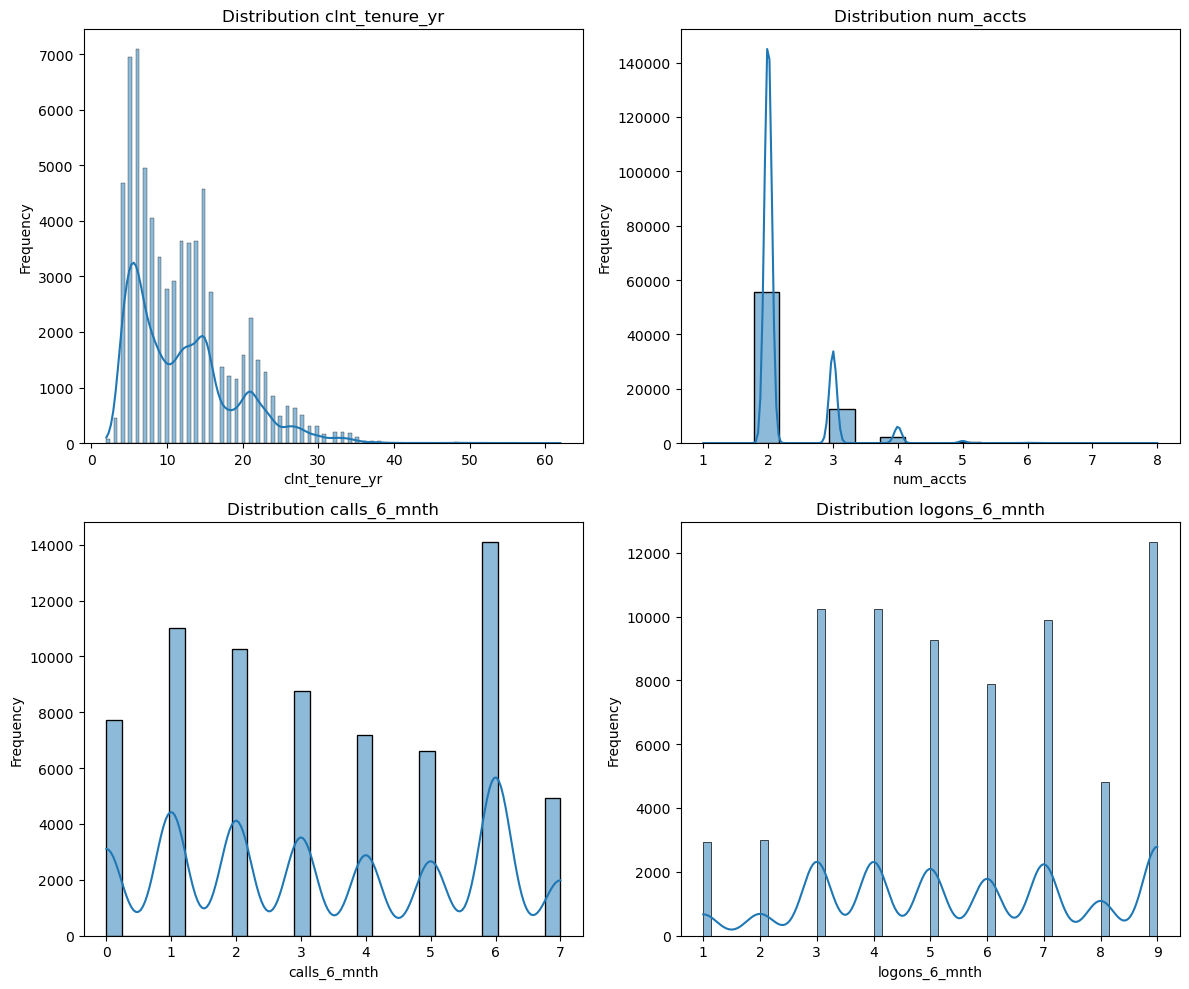

In [71]:
#Comments

#Data missing values: Gender
# Desktop and Mobile

#check behaviours of overall clients of the company (calls, etc)
#histogram for calls
#histograms for overall data

# Create a figure with subplots for each column
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust layout based on number of columns

# List of columns to plot
columns = ['clnt_tenure_yr', 'num_accts', 'calls_6_mnth', 'logons_6_mnth']

# Loop through each column and plot a histogram
for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]  # Position in the subplot grid
    sns.histplot(df_2[col], kde=True, ax=ax)  # Add kde=True for the kernel density estimate
    ax.set_title(f'Distribution {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


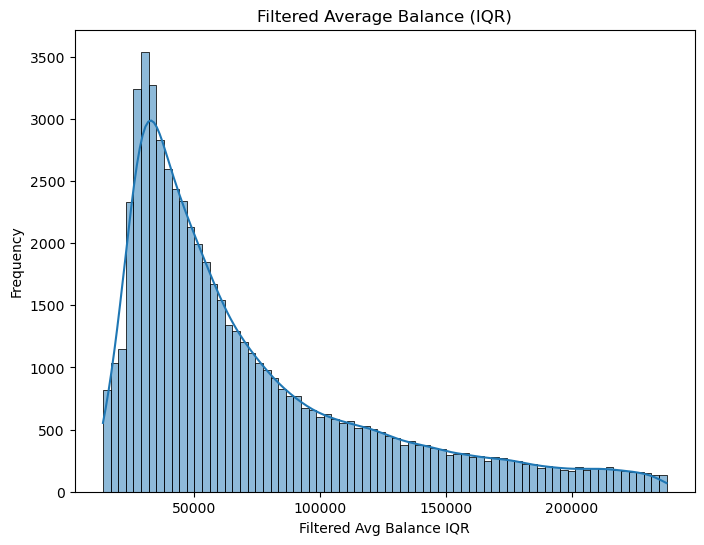

In [72]:

#Histogram of balance for data with outliers removed

plt.figure(figsize=(8, 6))

# Create a histogram for the 'filtered_avg_balance_iqr' column
sns.histplot(filtered_avg_balance_iqr['balance'], kde=True)

# Add labels and title
plt.title('Filtered Average Balance (IQR)')
plt.xlabel('Filtered Avg Balance IQR')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [141]:
df_final.head(50)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time,time_spent,previous_step,previous_step_index,current_step_index
255396,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,NaN,None,-1,0
255395,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,7.0,start,0,1
255394,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,32.0,step_1,1,2
255393,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,99.0,step_2,2,3
255392,555,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,20.0,step_3,3,4
9749,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28,-249546.0,confirm,4,0
9748,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,7.0,start,0,1
9747,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_2,2017-04-12 15:41:53,18.0,step_1,1,2
9746,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,step_3,2017-04-12 15:45:02,189.0,step_2,2,3
9745,647,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0,Test,66758770_53988066587,40369564_40101682850_311847,confirm,2017-04-12 15:47:45,163.0,step_3,3,4


In [157]:
# Hypotheses

#Hyp. 1

#H0: The completion rate is not significantely different between the Test and Control groups.
#H1: The completion rate of the Test group is significantely higher than the one of the control group.
#The outcome suggests that the Test group does not have a significantly higher completion rate than the Control group. 
#In fact, based on the negative z-statistic, the Test group likely performs worse than the Control group. 
#Therefore, the Test variation did not improve completion rates, and any changes made in the Test may have negatively impacted performance.

#Proportions Test
from statsmodels.stats.proportion import proportions_ztest

control = df_final[df_final['Variation'] == "Control"]
test = df_final[df_final['Variation'] == "Test"]

#successes
successes = [unique_client_count_test_confirmation, unique_client_count_control_confirmation]

totals = [unique_client_count_test, unique_client_count_control]


alpha = 0.05

proportions_ztest(successes, totals, alternative = "larger")

(-25.855598849164654, 1.0)

In [155]:
#USE THIS ONE FOR HYPOTHESIS 1

#Hyp. 1

#H0: The completion rate is  significantely different between the Test and Control groups.
#H1: The completion rate of the Control group is significantely higher than the one of the Test group.
#With this result, you have strong evidence to support the hypothesis that the Control group performs significantly better than the Test group. 
#The Test group had a lower completion rate, and the difference is highly significant.
#This outcome suggests that any changes made in the Test group had a negative impact on performance, making the Control group's approach more effective.

from statsmodels.stats.proportion import proportions_ztest

control = df_final[df_final['Variation'] == "Control"]
test = df_final[df_final['Variation'] == "Test"]

#successes
successes = [unique_client_count_control_confirmation, unique_client_count_test_confirmation]

totals = [unique_client_count_control,unique_client_count_test]


alpha = 0.05

proportions_ztest(successes, totals, alternative = "larger")

(25.855598849164654, 1.0523826024207237e-147)

In [161]:
#Hyp. 2

#H0: The increase of the completion rate between the Test and Control groups is less than 5%.
#H1: The increase of the completion rate between the Test and Control groups is at least 5%.

from statsmodels.stats.proportion import proportions_ztest

# Run z-test with a null hypothesis difference of 0.05 (5%)
# The null value is set to 0.05, the minimum expected increase
null_difference = 0.05
count_diff = null_difference * totals[1]  # Expected difference converted to number of clients

z_stat, p_value = proportions_ztest(successes, totals, value=null_difference, alternative="larger")

print(f"z-statistic: {z_stat}, p-value: {p_value}")
#there is not enough evidence to conclude that the Test group’s increase is significantly greater than 5% because the p value is a lot larger than 0.05

z-statistic: -38.6334723787097, p-value: 1.0


In [ ]:
#Hyp. 3

#H0: The average age of clients engaging with the new process is the same as those engaging with the old. 
#H1: The average age of clients engaging with the new process is lower than as those engaging with the old.

#Hyp. 4

#H0: The average client tenure of those engaging with the new process is the same as those engaging with the old process.
#H1: The average client tenure of those engaging with the new process is lower than those engaging with the old process.